In [ ]:
import re # regex
import sklearn
import pandas as pd # tables
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import numpy as np # operations with arrays and matrices
from sklearn.model_selection import train_test_split

In [ ]:
# reading the dataset
'''train = pd.read_csv('train.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')
test = pd.read_csv('test.txt', header=None, sep =';', names=['Lines','Emotions'], encoding='utf-8')
validation = pd.read_csv('val.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')'''

"train = pd.read_csv('train.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')\ntest = pd.read_csv('test.txt', header=None, sep =';', names=['Lines','Emotions'], encoding='utf-8')\nvalidation = pd.read_csv('val.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')"

K-FOLD CROSS VALIDATION


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Define the emotions-to-labels mapping
emotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}

# Read the data from the single CSV file
data = pd.read_csv('data.txt', header=None, sep=';', names=['Lines','Emotions'], encoding='utf-8')

# Shuffle the data randomly
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the number of folds (e.g., 5-fold cross-validation)
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize empty DataFrames for train, test, and validation
train_data = pd.DataFrame(columns=['Emotions', 'Lines', 'Labels'])
test_data = pd.DataFrame(columns=['Emotions', 'Lines', 'Labels'])
validation_data = pd.DataFrame(columns=['Emotions', 'Lines', 'Labels'])

# Iterate through the folds
for train_index, test_index in skf.split(data['Lines'], data['Emotions']):
    fold_train_data = data.iloc[train_index]
    fold_test_data = data.iloc[test_index]

    # Split the fold_train_data into train and validation sets (e.g., 80-20 split)
    fold_train_size = int(len(fold_train_data) * 0.8)
    fold_validation_data = fold_train_data.iloc[fold_train_size:]
    fold_train_data = fold_train_data.iloc[:fold_train_size]

    # Map emotions to labels for each fold
    fold_train_data['Labels'] = fold_train_data['Emotions'].replace(emotions_to_labels)
    fold_test_data['Labels'] = fold_test_data['Emotions'].replace(emotions_to_labels)
    fold_validation_data['Labels'] = fold_validation_data['Emotions'].replace(emotions_to_labels)

    # Concatenate fold data to the respective DataFrames
    train_data = pd.concat([train_data, fold_train_data], ignore_index=True)
    test_data = pd.concat([test_data, fold_test_data], ignore_index=True)
    validation_data = pd.concat([validation_data, fold_validation_data], ignore_index=True)

# Now, you have train_data, test_data, and validation_data as pandas DataFrames'''


<ipython-input-3-34b9baee02cb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_data['Labels'] = fold_test_data['Emotions'].replace(emotions_to_labels)
<ipython-input-3-34b9baee02cb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_data['Labels'] = fold_test_data['Emotions'].replace(emotions_to_labels)
<ipython-input-3-34b9baee02cb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
data.head(10)

,Lines,Emotions
0,i feel assured that foods that are grown organ...,joy
1,i already have my christmas trees up i got two...,joy
2,i feel all betrayed and disillusioned,sadness
3,i will tell you that i am feeling quite invigo...,joy
4,i start to feel less exhausted the bits and pi...,sadness
5,i was listening to belle and sebastian feeling...,fear
6,i be able to look them in the face again witho...,sadness
7,i am thankful for feeling useful,joy
8,i woke up feeling artistic ish,joy
9,i was taunted by the ability of feeling threat...,fear


In [ ]:
# After concatenating the data, rename the DataFrames
train = train_data
test = test_data
validation = validation_data

# Now, you have train, test, and validation as pandas DataFrames


In [ ]:
# adding a column with encoded emotions
emotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}

train['Labels'] = train['Emotions'].replace(emotions_to_labels)
test['Labels'] = test['Emotions'].replace(emotions_to_labels)
validation['Labels'] = validation['Emotions'].replace(emotions_to_labels)

In [ ]:
# adding a column with encoded emotions
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}
emotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
train['Labels'] = train['Emotions'].replace(emotions_to_labels)
test['Labels'] = test['Emotions'].replace(emotions_to_labels)
validation['Labels'] = validation['Emotions'].replace(emotions_to_labels)
'''
emotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}

train['Labels'] = train['Emotions'].replace(emotions_to_labels)
test['Labels'] = test['Emotions'].replace(emotions_to_labels)
validation['Labels'] = validation['Emotions'].replace(emotions_to_labels)'''

"\nemotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}\nlabels_to_emotions = {j:i for i,j in emotions_to_labels.items()}\n\ntrain['Labels'] = train['Emotions'].replace(emotions_to_labels)\ntest['Labels'] = test['Emotions'].replace(emotions_to_labels)\nvalidation['Labels'] = validation['Emotions'].replace(emotions_to_labels)"

In [ ]:
train.head()

,Emotions,Lines,Labels
0,joy,i feel assured that foods that are grown organ...,3
1,joy,i already have my christmas trees up i got two...,3
2,sadness,i feel all betrayed and disillusioned,4
3,joy,i will tell you that i am feeling quite invigo...,3
4,fear,i was listening to belle and sebastian feeling...,2


In [ ]:
def visualize_labels_distribution(df, title='the'):
  '''
  Accepts a dataframe with 'Emotions' column and dataset title (e.g. 'train')
  Creates bar chart with num of elements of each category
  Returns nothing

  '''
  # create a pandas series with labels and their counts
  num_labels = df['Emotions'].value_counts()

  # num of unique categories
  x_barchart = range(df['Emotions'].nunique())
  # list of labels
  x_barchart_labels = [str(emotions_to_labels[emotion]) +\
                       ' - ' + emotion for emotion in list(num_labels.index)]

  # list of counts
  y_barchart = list(num_labels.values)

  # creating bar chart
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # adding num of elements for each category on plot as text
  for index, data in enumerate(y_barchart):
    plt.text(x = index,
            y = data+max(y_barchart)/100,
            s = '{}'.format(data),
            fontdict = dict(fontsize=10),
            ha = 'center',)

  plt.xticks(x_barchart, x_barchart_labels, rotation=40)
  plt.title('Num of elements of each category for {} dataset'.format(title))
  plt.tight_layout()

  print('There are {} records in the dataset.\n'.format(len(df.index)))

  plt.show()

There are 64000 records in the dataset.



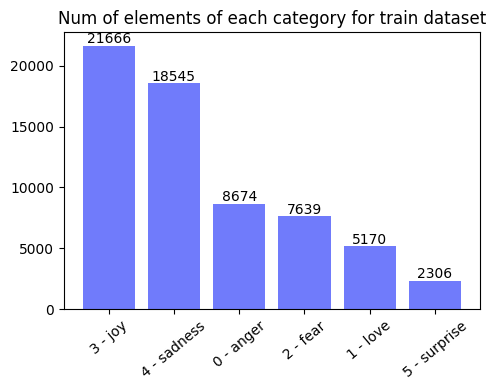

There are 20000 records in the dataset.



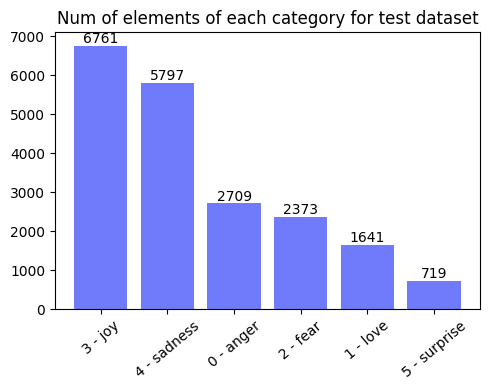

There are 16000 records in the dataset.



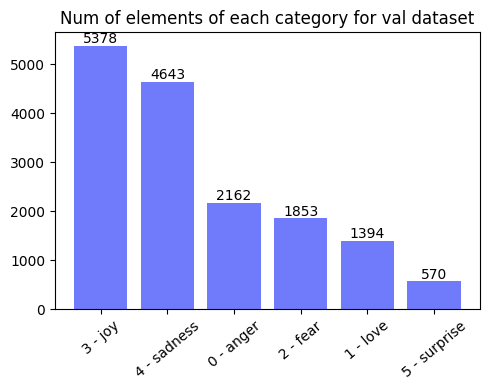

In [ ]:
visualize_labels_distribution(train, 'train')
visualize_labels_distribution(test, 'test')
visualize_labels_distribution(validation, 'val')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# downloading a set of stop-words
STOPWORDS = set(stopwords.words('english'))

# tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocess(text, stop_words=False):
  '''
  Accepts text (a single string) and
  a parameters of preprocessing
  Returns preprocessed text

  '''
  # clean text from non-words
  text = re.sub(r'\W+', ' ', text).lower()

  # tokenize the text
  tokens = word_tokenize(text)
  if stop_words:
    # delete stop_words
    tokens = [token for token in tokens if token not in STOPWORDS]

  return tokens

In [ ]:
print('Before: ')
print(train.head())

x_train = [text_preprocess(t, stop_words=True) for t in train['Lines']]
y_train = train['Labels'].values

print('\nAfter:')
for line_and_label in list(zip(x_train[:5], y_train[:5])):
  print(line_and_label)

Before: 
  Emotions                                              Lines  Labels
0      joy  i feel assured that foods that are grown organ...       3
1      joy  i already have my christmas trees up i got two...       3
2  sadness              i feel all betrayed and disillusioned       4
3      joy  i will tell you that i am feeling quite invigo...       3
4     fear  i was listening to belle and sebastian feeling...       2

After:
(['feel', 'assured', 'foods', 'grown', 'organic', 'free', 'pesticides', 'soil', 'water', 'contaminated', 'good', 'us'], 3)
(['already', 'christmas', 'trees', 'got', 'two', 'feeling', 'festive', 'sure', 'spurring', 'get', 'started', 'book'], 3)
(['feel', 'betrayed', 'disillusioned'], 4)
(['tell', 'feeling', 'quite', 'invigorated'], 3)
(['listening', 'belle', 'sebastian', 'feeling', 'agitated'], 2)


In [ ]:
x_test = [text_preprocess(t, stop_words=True) for t in test['Lines']]
y_test = test['Labels'].values

x_validation = [text_preprocess(t, stop_words=True) for t in validation['Lines']]
y_validation = validation['Labels'].values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from gensim.models import Word2Vec
model_w2v = Word2Vec(x_train + x_test + x_validation,vector_size=300,min_count = 2).wv

In [ ]:
def create_weight_matrix(model):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_vector('like').shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.key_to_index:
        w_matrix[index] = model.get_vector(word)
      else:
        skipped_words.append(word)

  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  return w_matrix


In [ ]:
DICT_SIZE = 15000
tokenizer = Tokenizer(num_words=DICT_SIZE)
total = x_train + x_test + x_validation
tokenizer.fit_on_texts(total)

x_train_max_len = max([len(i) for i in x_train])
x_test_max_len = max([len(i) for i in x_test])
x_validation_max_len = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_len, x_test_max_len, x_validation_max_len)

X_train = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN)

X_val = tokenizer.texts_to_sequences(x_validation)
X_val_pad = pad_sequences(X_val, maxlen=MAX_LEN)

In [ ]:
DICT_SIZE = 15000
weight_matrix = create_weight_matrix(model_w2v)
print(weight_matrix.shape)
print(weight_matrix)

0 words were skipped. Some of them:
[]
(15000, 300)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.32914516  0.0689297   0.59627181 ...  0.16499905  0.38351458
   0.18777579]
 [-0.34609604  0.38001972 -0.17382376 ... -1.12647247  0.65693045
  -0.04342413]
 ...
 [-0.01116865  0.06057563 -0.01737246 ... -0.02040872  0.04418004
  -0.03690318]
 [-0.01426659  0.05483237 -0.0018278  ... -0.00923205  0.05803693
  -0.03352671]
 [-0.01063087  0.03902679 -0.008418   ... -0.00772282  0.05651659
  -0.03261698]]


In [ ]:
# import models, layers, optimizers from tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, GRU, Lambda, Input, Attention, Flatten
from tensorflow.keras.optimizers import Adam

BILSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Embedding, Dropout
from tensorflow.keras.optimizers import Adadelta
# Assuming you have defined DICT_SIZE, weight_matrix, X_train_pad

input_shape = (X_train_pad.shape[1],)  # Input shape for 1D convolution
vocab_size = 15000
embedding_dim = 300
sequence_length = MAX_LEN
units = 64
output_dim = 6
model = Sequential()

model.add(Embedding(input_dim=DICT_SIZE,
                    output_dim=weight_matrix.shape[1],
                    input_length=X_train_pad.shape[1],
                    weights=[weight_matrix],
                    trainable=False))

model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adadelta(learning_rate = 0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 300)           4500000   
                                                                 
 conv1d (Conv1D)             (None, 33, 32)            28832     
                                                                 
 batch_normalization (Batch  (None, 33, 32)            128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 32)            3104      
                                                                 
 batch_normalization_1 (Bat  (None, 31, 32)            128       
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 32)            5

In [ ]:
'''vocab_size = 15000
embedding_dim = 300
sequence_length = MAX_LEN
units = 64
output_dim = 6
model = Sequential()
model.add(Input(shape=(MAX_LEN,)))
model.add(Embedding(weight_matrix.shape[0], weight_matrix.shape[1], input_length=MAX_LEN, weights = [weight_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics='accuracy')
model.summary()'''

"vocab_size = 15000\nembedding_dim = 300\nsequence_length = MAX_LEN\nunits = 64\noutput_dim = 6\nmodel = Sequential()\nmodel.add(Input(shape=(MAX_LEN,)))\nmodel.add(Embedding(weight_matrix.shape[0], weight_matrix.shape[1], input_length=MAX_LEN, weights = [weight_matrix]))\nmodel.add(Bidirectional(LSTM(128, return_sequences=True)))\nmodel.add(Dropout(0.2))\nmodel.add(Bidirectional(LSTM(256, return_sequences=True)))\nmodel.add(Dropout(0.2))\nmodel.add(Bidirectional(LSTM(128, return_sequences=False)))\nmodel.add(Dense(6, activation='softmax'))\nmodel.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics='accuracy')\nmodel.summary()"

In [ ]:
history=model.fit(X_train_pad, y_train,
                    validation_data = (X_val_pad, y_validation),
                    batch_size = 32,
                    epochs = 50)
'''history = model.fit(X_train_pad, y_train,
                    validation_data = (X_val_pad, y_validation),
                    batch_size = 8,
                    epochs = 10,
                    callbacks = stop)'''

Epoch 1/50
2000/2000 [==============================] - 159s 75ms/step - loss: 1.7822 - accuracy: 0.2492 - val_loss: 1.7651 - val_accuracy: 0.3036
Epoch 2/50
2000/2000 [==============================] - 148s 74ms/step - loss: 1.7622 - accuracy: 0.3101 - val_loss: 1.7398 - val_accuracy: 0.3159
Epoch 3/50
2000/2000 [==============================] - 148s 74ms/step - loss: 1.7414 - accuracy: 0.3272 - val_loss: 1.7143 - val_accuracy: 0.3181
Epoch 4/50
2000/2000 [==============================] - 149s 74ms/step - loss: 1.7197 - accuracy: 0.3344 - val_loss: 1.6892 - val_accuracy: 0.3234
Epoch 5/50
2000/2000 [==============================] - 148s 74ms/step - loss: 1.6975 - accuracy: 0.3351 - val_loss: 1.6647 - val_accuracy: 0.3284
Epoch 6/50
2000/2000 [==============================] - 150s 75ms/step - loss: 1.6756 - accuracy: 0.3390 - val_loss: 1.6416 - val_accuracy: 0.3341
Epoch 7/50
2000/2000 [==============================] - 148s 74ms/step - loss: 1.6545 - accuracy: 0.3391 - val_loss: 1

'history = model.fit(X_train_pad, y_train,\n                    validation_data = (X_val_pad, y_validation),\n                    batch_size = 8,\n                    epochs = 10,\n                    callbacks = stop)'

In [ ]:
model.evaluate(X_test_pad, y_test)

625/625 [==============================] - 9s 15ms/step - loss: 1.5478 - accuracy: 0.3789


[1.547770619392395, 0.37894999980926514]

In [ ]:
def plot_history(history):
    '''
    Plots training and validation accuracy and loss
    Accepts a single param - history, where
    history - keras.callbacks.History object
    Returns nothing

    '''
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, label='Training acc', color='#707bfb')
    plt.plot(x, val_accuracy, label='Validation acc', color='#fbcbff')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss', color='#707bfb')
    plt.plot(x, val_loss, label='Validation loss', color='#fbcbff')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.legend()

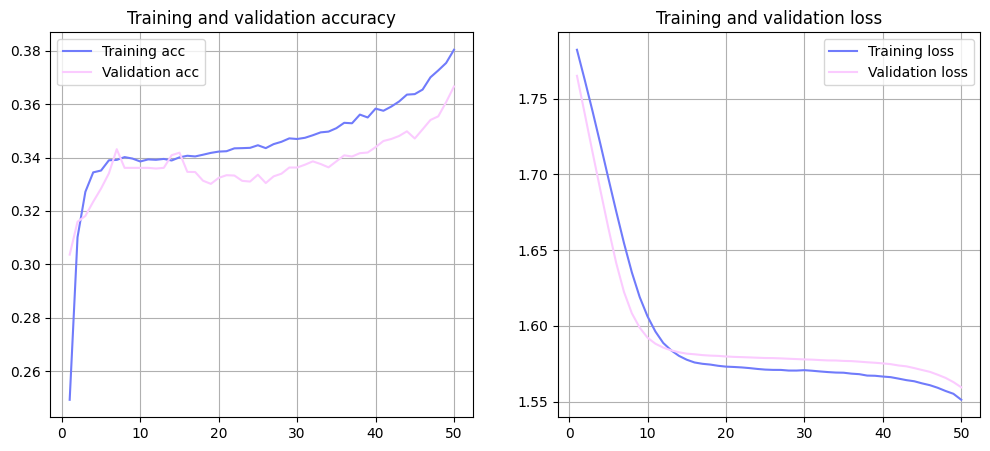

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(X_test_pad, y_test)
y_pred = np.argmax(model.predict(X_test_pad), axis=1)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

625/625 [==============================] - 11s 15ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2709
           1       0.00      0.00      0.00      1641
           2       0.00      0.00      0.00      2373
           3       0.43      0.54      0.48      6761
           4       0.34      0.68      0.45      5797
           5       0.00      0.00      0.00       719

    accuracy                           0.38     20000
   macro avg       0.13      0.20      0.16     20000
weighted avg       0.24      0.38      0.29     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# setting a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

In [ ]:
def plot_confusion_matrix(matrix, fmt=''):
  '''
  Accepts a confusion matrix and a format param
  Plots the matrix as a heatmap
  Returns nothing

  '''
  plt.figure(figsize=(6, 5))
  sns.heatmap(matrix, annot=True,
              cmap=cmap,
              fmt=fmt,
              xticklabels=emotions_to_labels.keys(),
              yticklabels=emotions_to_labels.keys())
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()

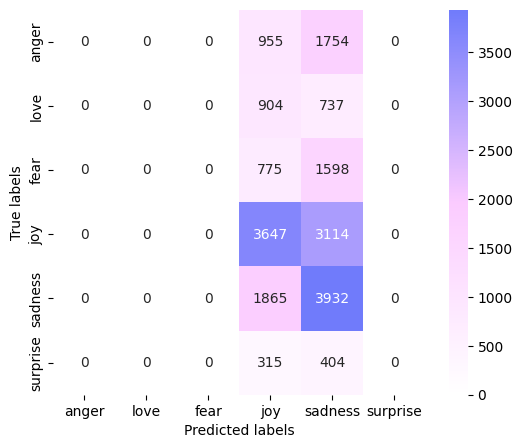

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix)

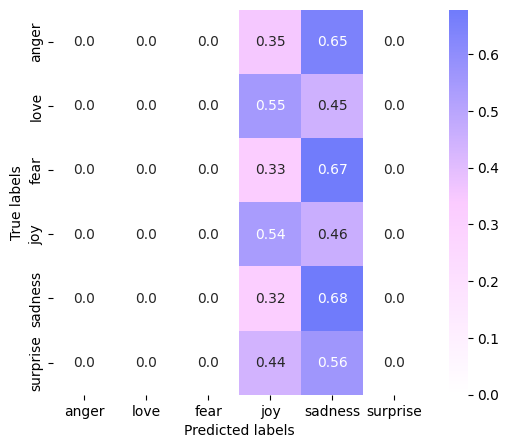

In [ ]:
# create new confusion matrix
# where values are normed by row
matrix_new = np.zeros(matrix.shape)

for row in range(len(matrix)):
  sum = np.sum(matrix[row])
  for element in range(len(matrix[row])):
    matrix_new[row][element] = matrix[row][element] / sum

plot_confusion_matrix(matrix_new, fmt='.2')

In [ ]:
def predict(texts):
  '''
  Accepts array if texts (strings)
  Prints sentence and the corresponding label (emotion)
  Returns nothing

  '''
  texts_prepr = [text_preprocess(t) for t in texts]
  sequences = tokenizer.texts_to_sequences(texts_prepr)
  pad = pad_sequences(sequences, maxlen=MAX_LEN)

  predictions = model.predict(pad)
  labels = np.argmax(predictions, axis=1)

  for i, lbl in enumerate(labels):
    print(f'\'{texts[i]}\' --> {labels_to_emotions[lbl]}')

In [ ]:
test_texts = ['I am so happy in the way you behaved today', 'The man felt lonely', 'The guests felt satisfied']

predict(test_texts)

1/1 [==============================] - 2s 2s/step
'I am so happy in the way you behaved today' --> sadness
'The man felt lonely' --> sadness
'The guests felt satisfied' --> sadness
